First we are going to get everything set up as usual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Now I am going to import the file as "sales" along with parsing the dates so that we have them in a date format and not an object

In [2]:
sales = pd.read_csv("sample-salesv2.csv",parse_dates=['date'])

Now simply going to confirm that everything imported correctly and the date parsed as expected.

In [3]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

Now going to have a look at a basic analysis of the data, good to refer back to later.

In [4]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


Now we are going to adress our first problem:
Determine which customers purchase the most?

We are going to start by creating a new array for just customers, with customer names, ext prices, and dates.
Then we are going to create a new array where the customers are grouped by their name and then summed using the grupoby command, as in the current format therwill be multiple lines for each customer. 
Finally we create another array called sorted_customers by using the sort_values which will simply order them in descending order which will be our list of customers who have purchased the greatest value of merchandise. 

In [5]:
customers = sales[['ext price', 'name', 'date']]

In [6]:
customers_group = customers.groupby('name').sum()

In [7]:
sorted_customers = customers_group.sort_values('ext price',ascending=False)

In [8]:
sorted_customers.head()

,ext price
name,
"Kihn, McClure and Denesik",38935.29
Waters-Walker,36778.96
Carroll PLC,35934.31
Hegmann and Sons,35213.72
Kunze Inc,34406.54


Now that that is all finished we can get to analysing the categories and those figures. We are going to do something very similar to what we did with the customers, except taking it one step further this time. 
To start we will create a new array called categories with the category and ext price. 
Then we are going to do the same thing to it that we did to the customers and group them by their category and then sum them in order to create an array that we can graph.
Finally we are going to use the .plot command to create a bar graph of sales.

In [9]:
categories = sales[['category','ext price','sku']]

In [10]:
categories_group = categories.groupby('category').sum()
categories_group

,ext price
category,
Belt,106514.55
Shirt,246775.13
Shoes,226554.22


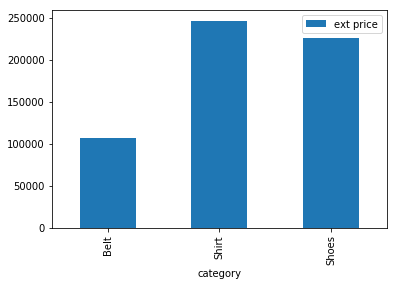

In [11]:
categories_group.plot(kind="bar")

Now to determine which items in each categories are performning the best I am going to start with our categories array. 

From this I am going to create a new array called categories_skus in which I have grouped the array by category and sku, while summing the ext price which enables me to see all 10 items, their category, and total revenue each item is bringing in. 

Next I am going to break it down for each category, by simply assessing the data and seeing which rows are which category(since it grouped the categories) and then simply slice that array into three smaller ones which will give me the best performing items in each category. I will do this by using the .loc command and simply choosing the rows that I want in each array.

Although this works, it is a little cumbersome and so it would be nice to find a more streamlined way that actually sliced them up by categories but I was not able to do that so this will have to do.

In [12]:
categories_skus = categories.groupby(['category','sku'], as_index=False).sum()
categories_skus

,category,sku,ext price
0,Belt,QN-82852,57577.31
1,Belt,WJ-02096,48937.24
2,Shirt,AS-93055,65756.89
3,Shirt,FK-71853,56888.83
4,Shirt,KV-99194,65972.27
5,Shirt,VG-32047,58157.14
6,Shoes,GS-86623,54528.92
7,Shoes,LL-46261,56669.23
8,Shoes,LW-86841,56574.86
9,Shoes,MJ-21460,58781.21


In [13]:
#Simply slcing and displaying the data for the belts category
belts_skus = categories_skus.loc[[0,1]]
belts_skus

,category,sku,ext price
0,Belt,QN-82852,57577.31
1,Belt,WJ-02096,48937.24


In [14]:
#same thing but for the shirts
shirts_skus = categories_skus.loc[2:5]
shirts_skus

,category,sku,ext price
2,Shirt,AS-93055,65756.89
3,Shirt,FK-71853,56888.83
4,Shirt,KV-99194,65972.27
5,Shirt,VG-32047,58157.14


In [15]:
#shoes this time
shoes_skus = categories_skus.loc[6:]
shoes_skus

,category,sku,ext price
6,Shoes,GS-86623,54528.92
7,Shoes,LL-46261,56669.23
8,Shoes,LW-86841,56574.86
9,Shoes,MJ-21460,58781.21


Now we are going to go ahead and make one more valuble chart. To plot our sales over time we need to go ahead and slice the data down and then go ahead and graph it

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


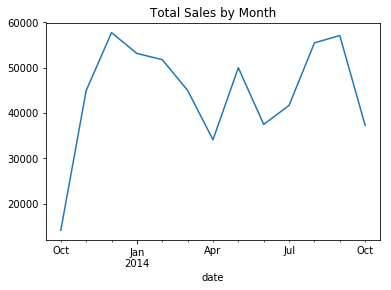

In [17]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns = purchase_patterns.set_index('date')
month_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None,)
